# **MODEL**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
!gdown -- 1RZmZ0UaQzzxJZtmTpy3tg_rKBG0CDVRo

Downloading...
From: https://drive.google.com/uc?id=1RZmZ0UaQzzxJZtmTpy3tg_rKBG0CDVRo
To: /content/ngirit_datasetnew.csv
100% 1.16M/1.16M [00:00<00:00, 130MB/s]


In [3]:
# Load and preprocess your dataset
data = pd.read_csv('ngirit_datasetnew.csv')

In [4]:
data = data.drop('merchant_area',axis=1).replace(to_replace = 'NAN', value=np.NaN)
data['rating'] = pd.to_numeric(data['rating'])
data['rating'].fillna(float(data['rating'].mean()),inplace=True)

In [5]:
# Encode the target variable
label_encoder = LabelEncoder()
data['sub_category_encoded'] = label_encoder.fit_transform(data['sub_category'])

In [6]:
# Combining relevant columns to create text for cosine similarity calculation
data['combined_features'] = data[['merchant_name', 'main_category', 'sub_category', 'product']].apply(lambda x: ' '.join(x), axis=1)

In [7]:
# Create a keyword matching matrix using CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data['combined_features'])

In [8]:
# Split the dataset into train and test sets
y = data['sub_category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Convert the sparse matrix to a dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

In [10]:
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

In [11]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1),
                          input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])

In [12]:
# Adjust the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [13]:
# Compile the Model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/100
274/274 [==============================] - 6s 17ms/step - loss: 3.2481 - accuracy: 0.5637 - val_loss: 1.4590 - val_accuracy: 0.7696
Epoch 2/100
274/274 [==============================] - 5s 20ms/step - loss: 1.4397 - accuracy: 0.7878 - val_loss: 1.2207 - val_accuracy: 0.8727
Epoch 3/100
274/274 [==============================] - 5s 17ms/step - loss: 1.2794 - accuracy: 0.8354 - val_loss: 1.0910 - val_accuracy: 0.8960
Epoch 4/100
274/274 [==============================] - 5s 19ms/step - loss: 1.1767 - accuracy: 0.8599 - val_loss: 0.9990 - val_accuracy: 0.9092
Epoch 5/100
274/274 [==============================] - 5s 19ms/step - loss: 1.1080 - accuracy: 0.8700 - val_loss: 0.9414 - val_accuracy: 0.9120
Epoch 6/100
274/274 [==============================] - 5s 17ms/step - loss: 1.0503 - accuracy: 0.8830 - val_loss: 0.8922 - val_accuracy: 0.9206
Epoch 7/100
274/274 [==============================] - 5s 20ms/step - loss: 1.0021 - accuracy: 0.8929 - val_loss: 0.8453 - val_accuracy:

In [15]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

69/69 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.9740
Accuracy: 0.9739963412284851


# **DATA SHOW**

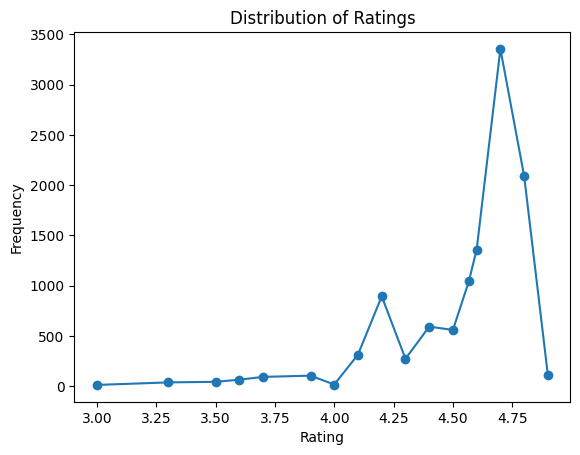

In [16]:
# Ambil data rating dari dataset
ratings = data['rating']

# Hitung frekuensi masing-masing rating
rating_counts = ratings.value_counts().sort_index()

# Buat grafik titik garis
plt.plot(rating_counts.index, rating_counts.values, marker='o', linestyle='-')

# Atur label dan judul
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Tampilkan grafik
plt.show()

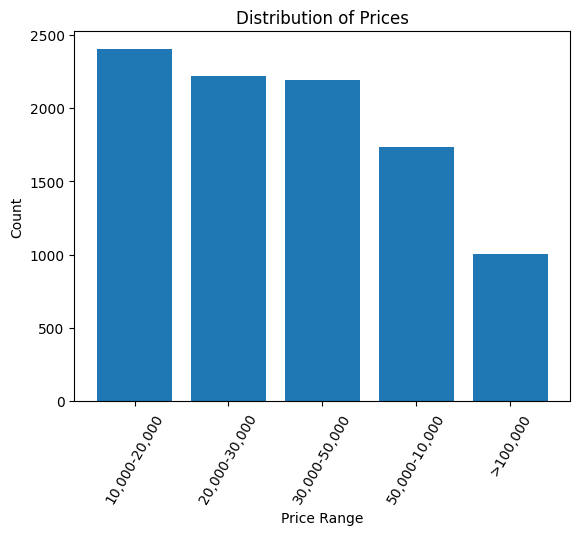

In [17]:
# Menentukan rentang harga
price_ranges = ['10,000-20,000', '20,000-30,000', '30,000-50,000', '50,000-10,000', '>100,000']

# Mengelompokkan data berdasarkan rentang harga
data['price_range'] = pd.cut(data['price'], bins=[10000, 20000, 30000, 50000, 100000, float('inf')], labels=price_ranges)

# Menghitung jumlah entri dalam setiap rentang harga
price_counts = data['price_range'].value_counts().sort_index()

# Membuat grafik batang
plt.bar(price_counts.index, price_counts.values)

# Mengatur label dan judul
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Prices')

# Atur rotasi label jika diperlukan
plt.xticks(rotation=60)

# Menampilkan grafik
plt.show()

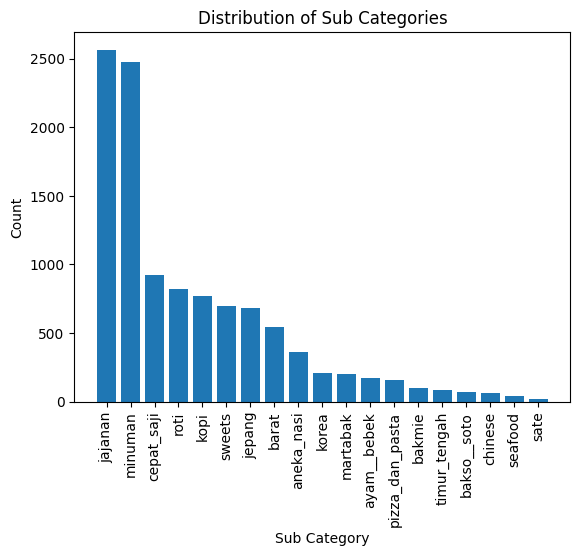

In [18]:
# Ambil data sub kategori dari dataset
sub_categories = data['sub_category']

# Hitung jumlah kemunculan setiap sub kategori
sub_category_counts = sub_categories.value_counts()

# Buat grafik batang
plt.bar(sub_category_counts.index, sub_category_counts.values)

# Atur label dan judul
plt.xlabel('Sub Category')
plt.ylabel('Count')
plt.title('Distribution of Sub Categories')

# Atur rotasi label jika diperlukan
plt.xticks(rotation=90)

# Tampilkan grafik
plt.show()

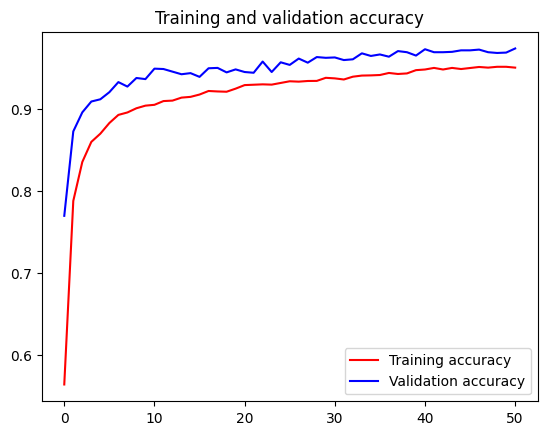

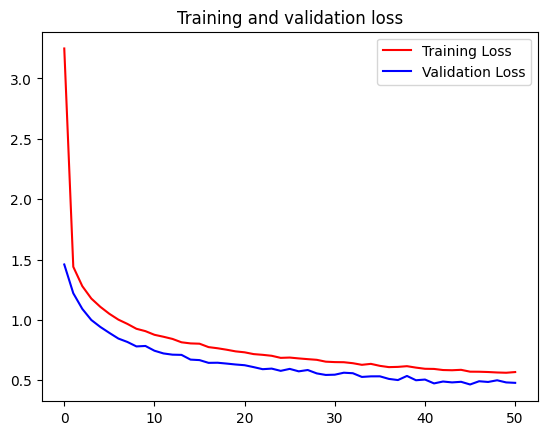

In [19]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **SAVE MODEL**

In [20]:
# Define the directory to save the model
save_dir = '/content/saved_models'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Define the filename for the saved model
model_filename = 'modelCapstone.h5'

# Construct the complete path
saved_model_path = os.path.join(save_dir, model_filename)

# Save the trained model
model.save(saved_model_path)

h5_model_path = '/content/saved_models/modelCapstone.h5'
model = tf.keras.models.load_model(h5_model_path)

tf.saved_model.save(model, save_dir)

# **CONVERT TFLITE**

In [21]:
# Create nested directories
!mkdir -p /content/convert/converttflite

tfjs_target_dir_lite = "/content/convert/converttflite"

converter = tf.lite.TFLiteConverter.from_saved_model(save_dir)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_path = "/content/convert/converttflite/modelCapstone.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

# **TEST TFLITE**

In [22]:
# Load the TFLite model
tflite_model_path = "/content/convert/converttflite/modelCapstone.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
def predict_and_recommend_products(price, sub_category, data):
    if sub_category not in data['sub_category'].values:
        print(f"Sub kategori {sub_category} tidak ditemukan dalam data.")
        return None

    # Create a dataframe with the input data
    input_data = pd.DataFrame({'price': [price], 'sub_category': [sub_category]})
    
    # Preprocess the input data
    input_data['rating'] = data['rating'].mean()  # Set the rating as the average rating in the dataset
    input_data['sub_category_encoded'] = label_encoder.transform(input_data['sub_category'])
    input_data['combined_features'] = input_data[['sub_category']].apply(lambda x: ' '.join(x), axis=1)
    
    # Transform the input data using the CountVectorizer
    input_features = cv.transform(input_data['combined_features']).toarray().astype(np.float32)
    
    # Make predictions using the TensorFlow Lite model
    interpreter.set_tensor(input_details[0]['index'], input_features)
    interpreter.invoke()
    predictions = interpreter.get_tensor(output_details[0]['index'])
    
    # Get the predicted class label
    predicted_class = np.argmax(predictions)
    
    # Filter the data based on the predicted class label and price range
    filtered_data = data[(data['sub_category_encoded'] == predicted_class) & (data['price'] <= price)]
    
    # Check if any recommendations are found
    if filtered_data.empty:
        print(f'Tidak ada rekomendasi yang sesuai dengan jumlah uang Rp. {price}')
        return None

    # Sort the filtered data based on rating in descending order, then by price in ascending order
    sorted_data = filtered_data.sort_values(by=['rating', 'price'], ascending=[False, False])
    
    # Select the top 10 recommended products
    recommended_products = pd.DataFrame()
    merchant_counts = {}  # Dictionary to store the count of recommendations for each merchant
    
    for _, row in sorted_data.iterrows():
        merchant_name = row['merchant_name']
        
        if merchant_name not in merchant_counts:
            merchant_counts[merchant_name] = 0
        
        if merchant_counts[merchant_name] < 1:
            recommended_products = pd.concat([recommended_products, row.to_frame().T])
            merchant_counts[merchant_name] += 1

    return recommended_products[['product', 'merchant_name', 'price', 'rating']]

In [24]:
money = float(input("Masukkan jumlah uang: "))
sub_category = input("Masukkan sub kategori: ")
recommended_products = predict_and_recommend_products(money, sub_category, data)

# Check if any recommendations are found
if recommended_products is None:
    # Program finished when there are no recommendations
    pass
else:
    # Print the recommended products with merchant, price, and rating
    print('Recommended Products:')
    try:
        for i, row in recommended_products.iterrows():
            product = row['product']
            merchant_name = row['merchant_name']
            price = row['price']
            rating = row['rating']
            print(f'{i + 1}. Product: {product}')
            print(f'   Merchant: {merchant_name}')
            print(f'   Price: {price}')
            print(f'   Rating: {rating}\n')
    except AttributeError:
        print("ERROR")

Masukkan jumlah uang: 25000
Masukkan sub kategori: jajanan
Recommended Products:
3140. Product: Siomay Sultan
   Merchant: Kedai Coger Senayan
   Price: 24000.0
   Rating: 4.9

4254. Product: French Toast Smocked Beef Cheese Sandwich
   Merchant: Lawson, Kemang Raya
   Price: 25000.0
   Rating: 4.8

2043. Product: Fried Egg
   Merchant: farm.girl, SCBD
   Price: 24000.0
   Rating: 4.8

7340. Product: Indomie Goreng Jumbo
   Merchant: Toko Kopi Bacarita
   Price: 24000.0
   Rating: 4.8

3349. Product: Pukis 5Pc
   Merchant: KFC, Bintaro 9
   Price: 23000.0
   Rating: 4.8

3462. Product: Pukis 5Pc
   Merchant: KFC, Kemang Timur
   Price: 23000.0
   Rating: 4.8

2129. Product: Stainless Straw
   Merchant: Fore Coffee, Jatiwaringin
   Price: 22000.0
   Rating: 4.8

5376. Product: McNuggets 4 pcs
   Merchant: McDonald's, Panjang
   Price: 22000.0
   Rating: 4.8

5584. Product: McNuggets 4 pcs
   Merchant: McDonald's, Tambak
   Price: 22000.0
   Rating: 4.8

708. Product: French Fries Large
